In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
df= pd.read_csv("data.csv")
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
303,LP001977,Male,Yes,1,Graduate,No,1625,1803.0,96.0,360.0,1.0,Urban,Y
199,LP001673,Male,No,0,Graduate,Yes,11000,0.0,83.0,360.0,1.0,Urban,N
366,LP002187,Male,No,0,Graduate,No,2500,0.0,96.0,480.0,1.0,Semiurban,N
403,LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y
209,LP001702,Male,No,0,Graduate,No,3418,0.0,127.0,360.0,1.0,Semiurban,N
208,LP001699,Male,No,0,Graduate,No,2479,0.0,59.0,360.0,1.0,Urban,Y
70,LP001243,Male,Yes,0,Graduate,No,3208,3066.0,172.0,360.0,1.0,Urban,Y
154,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
157,LP001543,Male,Yes,1,Graduate,No,9538,0.0,187.0,360.0,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N


In [42]:
cat_features = [i for i in df.columns if df[i].dtype =='O']
cat_features.remove('Loan_ID')
cat_features.remove('Loan_Status')
cat_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [43]:
num_features = [i for i in df.columns if df[i].dtype !='O']
num_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

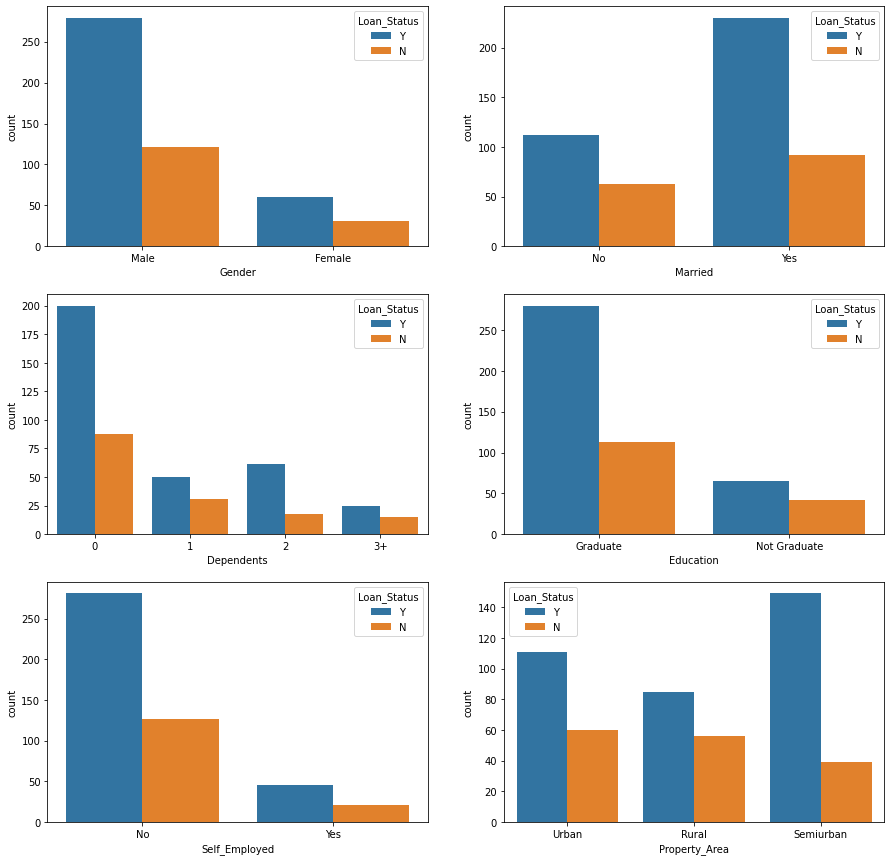

In [44]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(cat_features):
    sns.countplot(x = feature, hue = 'Loan_Status', ax = axs[i], data = df)

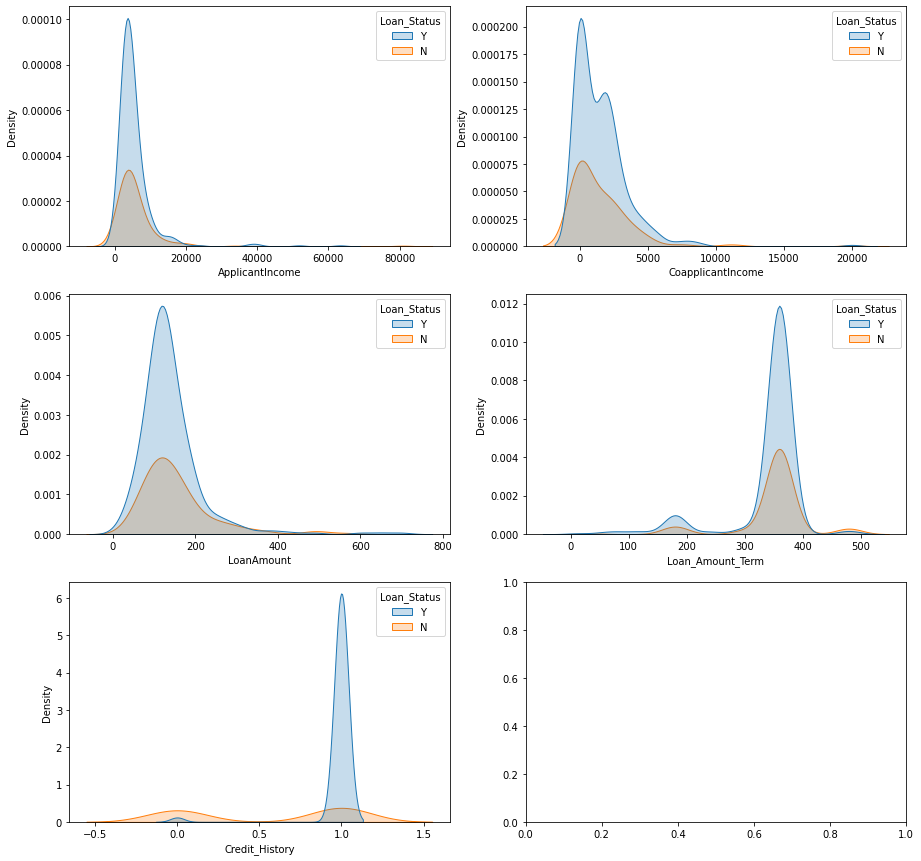

In [45]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(num_features):
    sns.kdeplot(x = feature, hue = 'Loan_Status', ax = axs[i], data = df, fill = True)

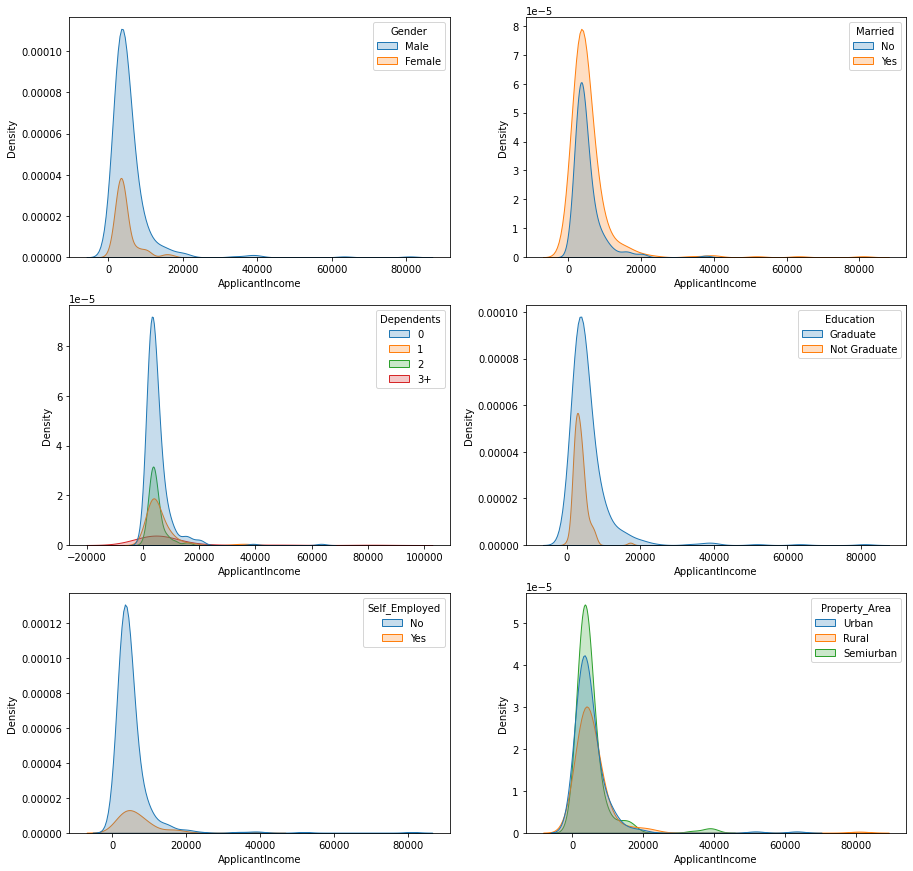

In [46]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(cat_features):
    sns.kdeplot(x = 'ApplicantIncome', hue = feature, ax = axs[i], data = df, fill = True)

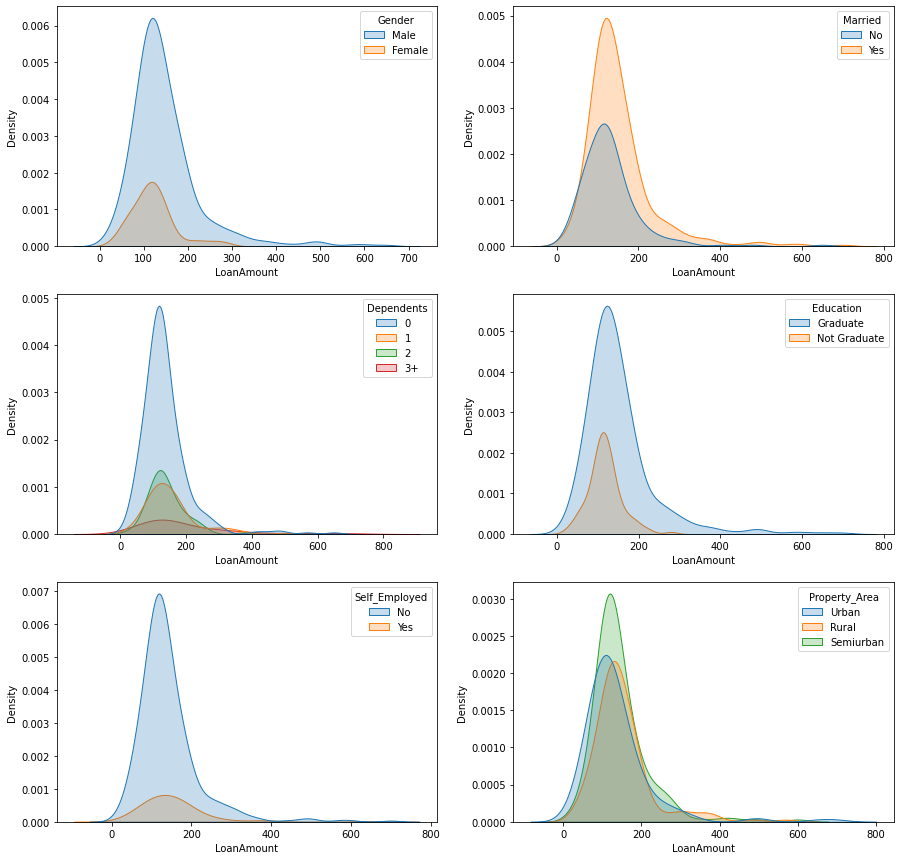

In [47]:
fig, ax = plt.subplots(3,2, figsize = (15,15))
axs = ax.ravel()
for i, feature in enumerate(cat_features):
    sns.kdeplot(x = 'LoanAmount', hue = feature, ax = axs[i], data = df, fill = True)

In [48]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [49]:
df.isnull().sum()

Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
dtype: int64

In [50]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [51]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [53]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
# df['Dependents'].fillna(df['Dependents'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace = True)
df['Dependents']=df['Dependents'].str.replace('+','')

<ipython-input-53-f7dbb28a4520>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Dependents']=df['Dependents'].str.replace('+','')


In [54]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)

In [55]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [56]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [57]:
df.drop(columns=['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome'], axis = 1, inplace=True)

<ipython-input-58-267fab12582a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<AxesSubplot: >

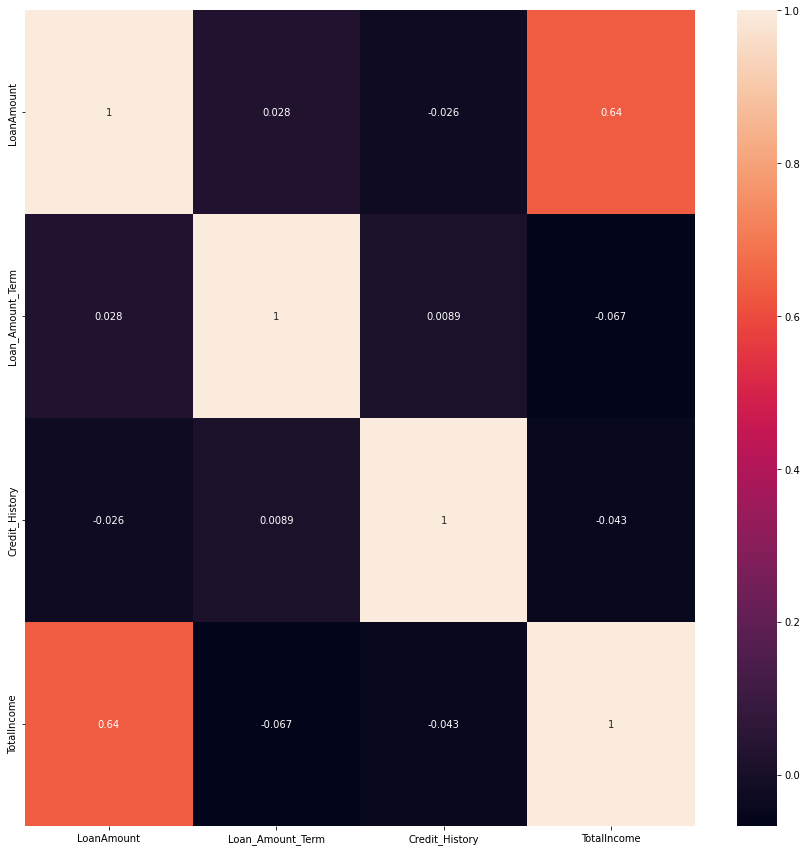

In [58]:
corr_matrix = df.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(15,15))
sns.heatmap(df[corr_features].corr(), annot = True)

<ipython-input-59-ebf61f791d5a>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


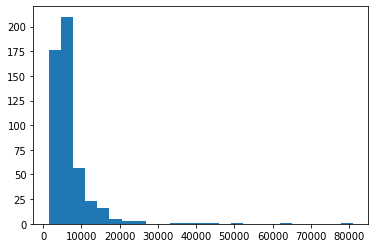

In [59]:
df['TotalIncome'].hist(bins =25)
plt.grid(b=None)

<ipython-input-60-960661fe5f47>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


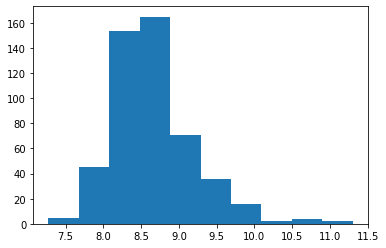

In [60]:
df['TotalIncome_log']= np.log(df['TotalIncome'])
df['TotalIncome_log'].hist()
plt.grid(b=None)

<ipython-input-61-3aa636b3fd1b>:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


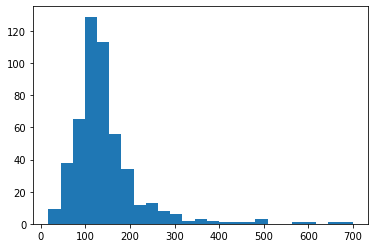

In [61]:
df['LoanAmount'].hist(bins =25)
plt.grid(b=None)

<ipython-input-62-98d35c739947>:3: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


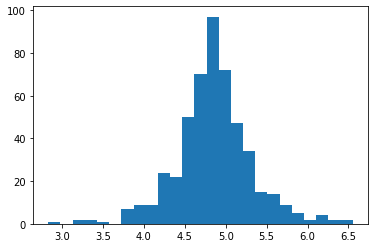

In [62]:
df['LoanAmount_log']= np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins = 25)
plt.grid(b=None)

In [63]:
df.drop(columns= ['LoanAmount', 'TotalIncome'], axis=1, inplace= True)

In [64]:
df = pd.get_dummies(df, drop_first= True)

In [65]:
df.shape

(500, 14)

In [66]:
y = df['Loan_Status_Y']
X = df.drop('Loan_Status_Y', axis=1)

In [67]:
print('shape of X:', X.shape)
print('shape of y:', y.shape)

shape of X: (500, 13)
shape of y: (500,)


In [68]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=5)

from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score


In [70]:
#logistic regression
log_model = LogisticRegression()
log_model.fit(xtrain, ytrain)

ypred = log_model.predict(xtest)

con_matrix = confusion_matrix(ytest, ypred)
acc_score = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)


cross_score = cross_val_score(log_model, X, y)
score = np.mean(cross_score)

# print('con_matrix:', con_matrix)
print('acc_score:', acc_score)
# print('report:', report)
# print('score:', score)

acc_score: 0.8


c:\users\bhushan\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot: >

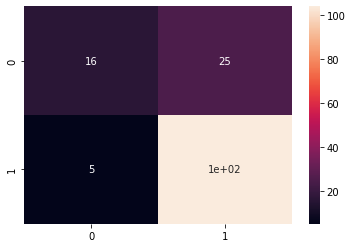

In [71]:
sns.heatmap(con_matrix, annot = True)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [73]:
scoreListRf = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(xtrain, ytrain)
    scoreListRf.append(RFclassifier.score(xtest, ytest))

# plt.plot(range(2,25), scoreListRf)
# plt.xticks(np.arange(2,25,1))
# plt.xlabel("RF Value")
# plt.ylabel("score")
# plt.show()
RFAcc=max(scoreListRf)
print("Random Forest Accuracy: {:.2f}%" .format(RFAcc*100))

Random Forest Accuracy: 81.33%


In [74]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(xtrain, ytrain)

ypred = SVCclassifier.predict(xtest)

print(classification_report(ytest, ypred))
print(confusion_matrix(ytest, ypred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(ypred, ytest)
print('SVC accuracy: {:.2f}%' .format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.80      0.39      0.52        41
           1       0.81      0.96      0.88       109

    accuracy                           0.81       150
   macro avg       0.80      0.68      0.70       150
weighted avg       0.81      0.81      0.78       150

[[ 16  25]
 [  4 105]]
SVC accuracy: 80.67%


In [75]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors=i)
    KNclassifier.fit(xtrain,ytrain)
    scoreListknn.append(KNclassifier.score(xtest, ytest))


# plt.plot(range(1,21), scoreListknn)
# plt.xticks(np.arange(1,21,1))
# plt.xlabel("K Value")
# plt.ylabel("Score")
# plt.show()
KNAcc=max(scoreListknn)
print("KNN best Accuracy: {:.2f}%" .format(KNAcc*100))

KNN best Accuracy: 80.67%


In [76]:
#AdaBoostClassifier
# Load libraries

from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(xtrain, ytrain)

#Predict the response for test dataset
ypred = model.predict(xtest)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypred))


Accuracy: 0.7733333333333333


In [77]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer, MissingIndicator




In [78]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=2)
    DTclassifier.fit(xtrain, ytrain)
    scoreListDT.append(DTclassifier.score(xtest, ytest))

# plt.plot(range(2,21), scoreListDT)
# plt.xtricks(np.arange(2,21,1))
# plt.xlabel("leaf")
# plt.ylabel("score")
# plt.show()
DTAcc = max(scoreListDT)
print("Decision tree Accuracy: {: .2f}%" .format(DTAcc*100))

Decision tree Accuracy:  80.67%


In [80]:
df.to_csv('preprocessed_data.csv', index=False)